In [121]:
import numpy as np 
import pandas as pd 
% matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns

In [122]:
data = pd.read_csv('amazon_baby.csv')

# Lets explore the data

In [123]:
data.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [124]:
data.describe()

,rating
count,183531.000000
mean,4.120448
std,1.285017
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [125]:
data.isnull().sum()

name      318
review    829
rating      0
dtype: int64

In [126]:
data = data[data.review.notnull()]
data.isnull().sum()

name      318
review      0
rating      0
dtype: int64

In [127]:
giraffe_reviews = data[data['name'] == 'Vulli Sophie the Giraffe Teether']
len(giraffe_reviews)

779

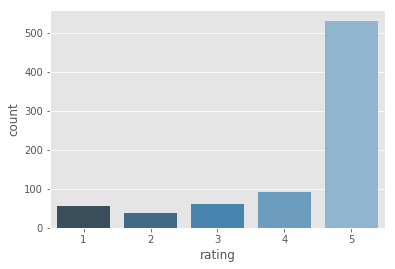

In [128]:
#https://seaborn.pydata.org/generated/seaborn.countplot.html
g_freq = sns.countplot(x = 'rating', data = giraffe_reviews, palette = 'Blues_d', )

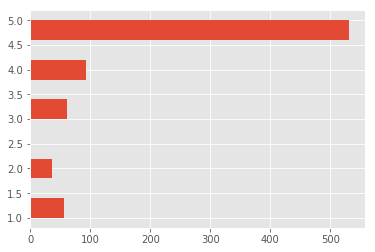

In [129]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
plt.style.use('ggplot')
plt.hist(giraffe_reviews['rating'], orientation = 'horizontal')
plt.show()

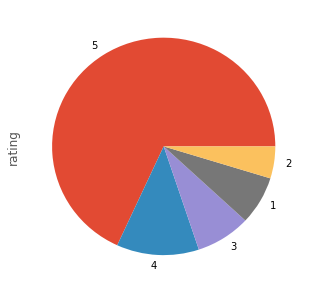

In [130]:
values = giraffe_reviews['rating'].value_counts()
values.plot(kind = 'pie', figsize=(5, 5))
#values.plot(kind= 'barh', figsize=(5, 5))
plt.show()

In [131]:
giraffe_reviews.head()

,name,review,rating
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5


# Build a sentiment classifier

<function matplotlib.pyplot.show(*args, **kw)>

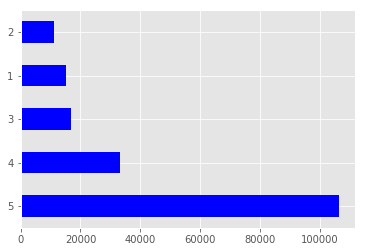

In [132]:
values_2 = data['rating'].value_counts()
values_2.plot(kind='barh', color='b')
plt.show

### Define what's a positive and a negative sentiment

In [133]:
data = data[data['rating']!=3]
# positive sentiment = 4* or 5* reviews
data['sentiment'] = data['rating']>=4
data.head()

,name,review,rating,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,True
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,True
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,True
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,True
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,True


# Build the word count vector for each review

In [134]:
#Clean Punctuation
def clear_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)### look at (str.maketrans) again
    return text.translate(translator)
data['clean review'] = data['review'].apply(clear_punctuation)
data.head()

,name,review,rating,sentiment,clean review
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,True,it came early and was not disappointed i love ...
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,True,Very soft and comfortable and warmer than it l...
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,True,This is a product well worth the purchase I h...
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,True,All of my kids have cried nonstop when I tried...
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,True,When the Binky Fairy came to our house we didn...


In [135]:
# split data into train and test datasets
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = .2)

In [138]:
##Build the word count vector for each review
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['clean review'])
test_matrix = vectorizer.fit_transform(test['clean review']) 
#print(vectorizer.vocabulary_)

# Train a sentiment classifier

In [139]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(train_matrix, train['sentiment'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#  Evaluate the model